In [38]:
# Packages for Data Preprocessing
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from copy import deepcopy

## Columns
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [39]:
# Load Files
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

## Step 1. 타겟 컬럼의 왜곡 제거
- 타겟 컬럼의 분포를 정규분포화 - 학습 및 예측에 긍정적인 효과를 줄 수 있음
- Reference: https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook

<Axes: >

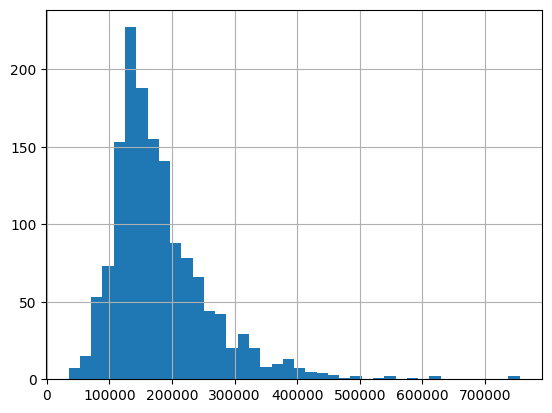

In [40]:
train['SalePrice'].hist(bins = 40) # 전반적으로 왼쪽에 치우친 형태인 것을 확인

<Axes: >

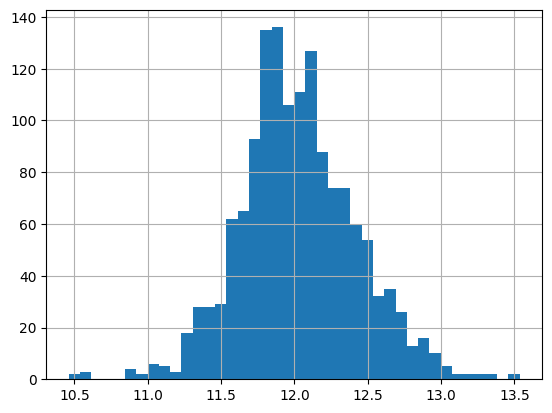

In [41]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop=True)
y.hist(bins = 40)

In [42]:
train_target = train["SalePrice"]
train = train.drop("SalePrice", axis=1)

data = pd.concat([train, test]) # 결측치 처리 및 데이터 분석을 위해 두 dataframe을 concat한 후 진행
data = data.drop("Id", axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

## Step 2. 결측치 처리
- 각 컬럼에 존재하는 결측치 처리
- Reference: [data_description.txt](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

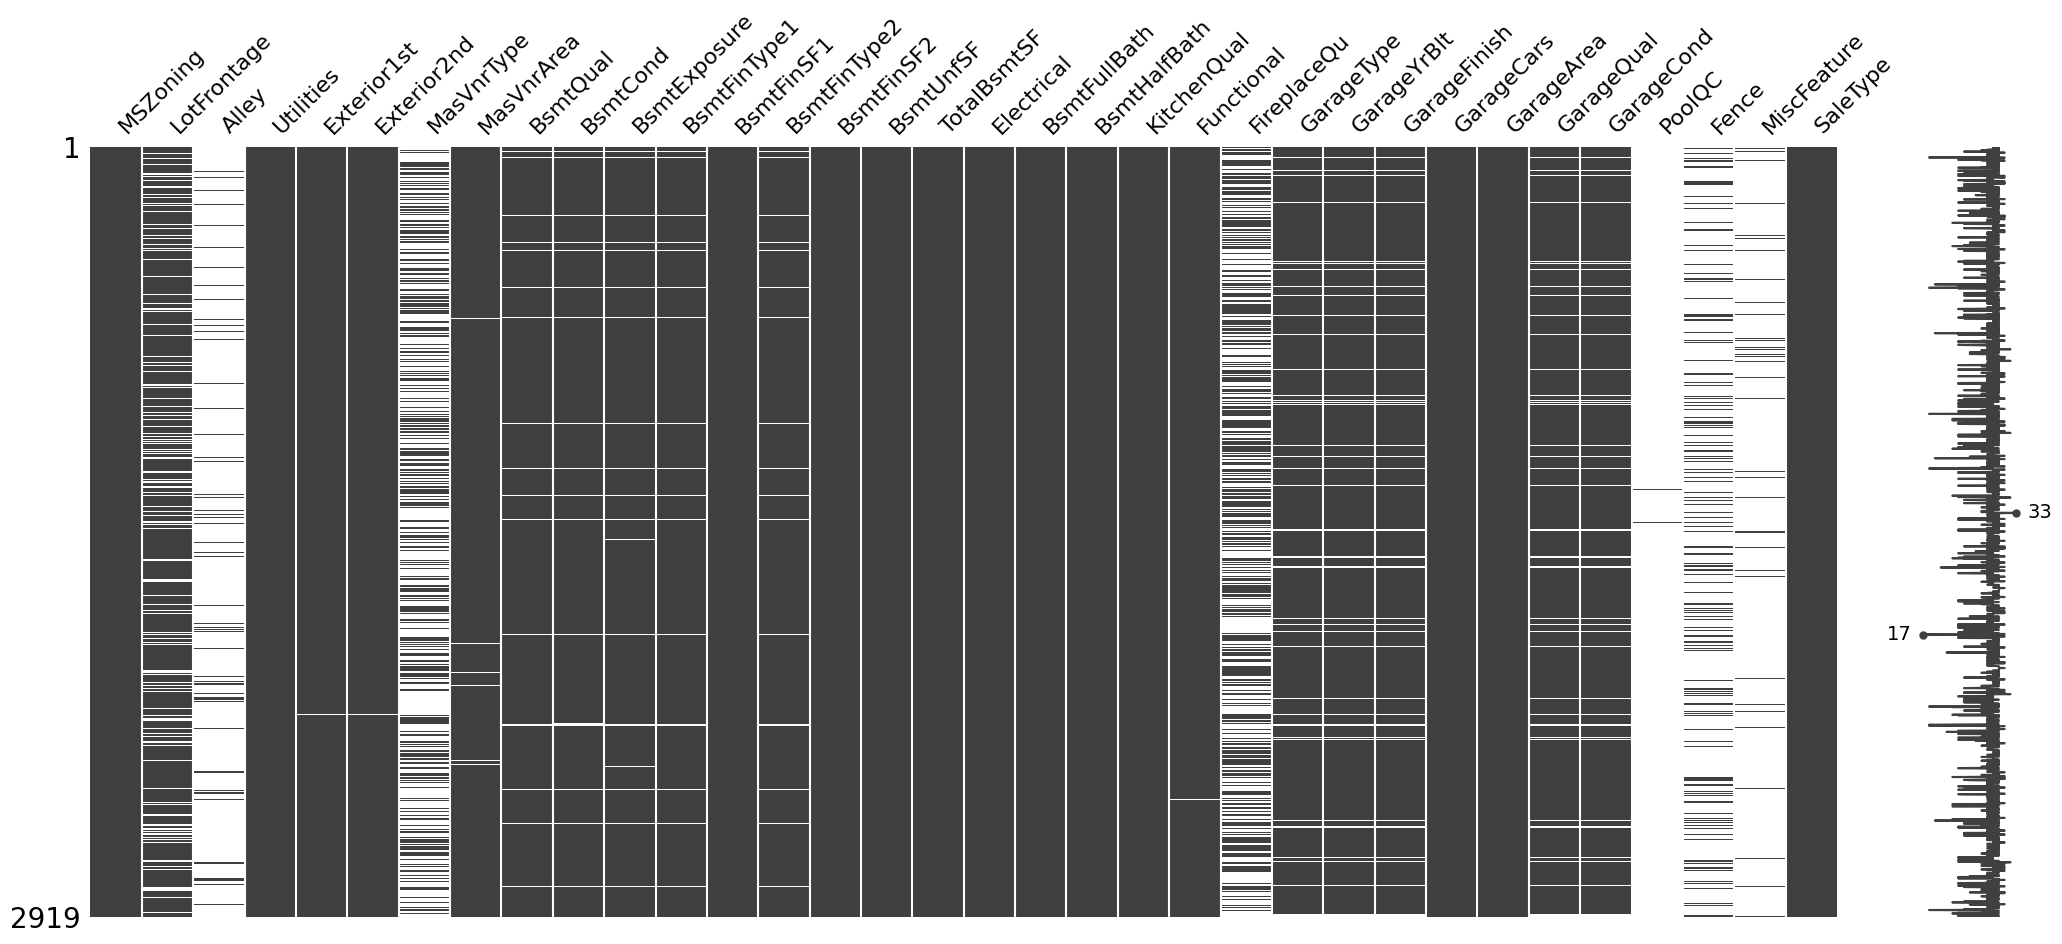

In [44]:
# 결측치를 포함한 column list 및 결측치 비율 확인
contain_null_list = [key for key in data.keys() if (data.isnull().sum() != 0)[key]] # null value를 포함하는 column list
msno.matrix(data[contain_null_list])
plt.show()

In [45]:
# 결측치를 "None" 혹은 0으로 채우기 위한 함수 생성
def fill_na_with_zero_or_none(df: pd.DataFrame, select_keys: list, idx: pd.Series = pd.Series()):
    """
    Fill nan values with 0(float, int) or None(object)
    
    Args:
        df(pd.DataFrame): dataframe to fill nan values
        select_keys(list): columns for fill nan with zero or None
        idx(pd.Series): indexes for fill nan with zero or None
    
    Output:
        df(pd.DataFrame): dataframe after filling nan values
    """
    df_origin = deepcopy(df)
    if not idx.empty:
        df = df.loc[idx]
    
    for key in select_keys:
        if df[key].dtype in [np.float64, np.int64]: # 정수형 컬럼
            df[key] = df[key].fillna(0)
        elif df[key].dtype == object:
            df[key] = df[key].fillna("None")
        else:
            print(df[key].dtype)
    if not idx.empty:
        df_origin.loc[idx] = df
        df = df_origin
    return df


In [46]:
# 0으로 채울 컬럼
# LotFrontage: 부동산과의 거리 - 결측치는 부동산이 따로 없다고 판단, 0으로 채움
# Exterior2nd: 2번째 외부 마감재 종류 - 결측치는 하나의 마감재만을 사용했다고 판단, None으로 채움 
# BsmtFullBath, BsmtHalfBath:  지하실 화장실 갯수 - 결측치는 없는 경우라 판단하고, 0으로 채움
# PoolQC: 풀장 퀄리티 - 결측치는 없는 경우, None으로 채움
# FireplaceQu: 벽난로 퀄리티 - 결측치는 없는 경우, None으로 채움
# MiscFeature: 기타 기능 - 결측치는 없는 경우, None으로 채움
# Fence: 펜스 퀄리티 - 결측치는 없는 경우, None으로 채움
# Alley: 주택 접근을 위한 골목길 유형 -  결측치는 None(골목길 접근 불가)로 채움
na_cols = ["LotFrontage", "Exterior2nd", "BsmtFullBath", "BsmtHalfBath", "PoolQC", "FireplaceQu", "MiscFeature", "Fence", "Alley"]
data = fill_na_with_zero_or_none(data, na_cols)

In [47]:
# 0 또는 None 으로 value를 채우지 않을 컬럼 결측치 처리
data["MSZoning"] = data["MSZoning"].fillna("RL") # 토지에 대한 일반 구역 분류(건물 형태), 가장 많은 경우를 차지한 RL로 결측치 처리
data["Utilities"] = data["Utilities"].fillna("AllPub") # 사용가능한 자원 종류, 가장 많은 종류인 "AllPub(모든 자원 사용 가능)"으로 결측치 처리
data["KitchenQual"] = data["KitchenQual"].fillna("TA") # 주방 퀄리티, 가장 많고 보편적인 "TA(전형적/평균)"으로 결측치 처리
data["Functional"] = data["Functional"].fillna("Typ") # 집의 전반적 기능, 특별한 사항 없이는 "Typ" 이므로 이것으로 결측치 처리
data["Exterior1st"] = data["Exterior1st"].fillna("VinylSd") # 주택 외부 1번째 마감재 종류, 가장 보편적인 "VinylSd"로 결측치 처리
data["Electrical"] = data["Electrical"].fillna("SBrkr") # 전력 시스템, 가장 흔한 "SBrkr(Standard Circuit Breakers & Romex)" 로 처리
data["SaleType"] = data["SaleType"].fillna("WD") # 판매 타입, 가장 흔한 "WD(Warranty Deed - Conventional)" 로 처리


In [48]:
[key for key in data.keys() if (data.isnull().sum() != 0)[key]] # null value를 포함하는 column list


['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [49]:
# 벽면의 벽돌 베니어 관련 변수
print(data["MasVnrType"].value_counts()) # 벽면의 벽돌 베니어 타입
print(data["MasVnrArea"].value_counts()) # 벽돌 베니어 면적

# 결측치 처리 전 결측치 수 확인
print(f"\n **Before: Type; {data.MasVnrType.isnull().sum()}, Area; {data.MasVnrArea.isnull().sum()}**")

# Type이 결측치이고, 면적이 0 인 경우 - 벽면의 벽돌 베니어가 없다고 가정, type을 "None"으로 채움
idx = (data["MasVnrArea"] == 0) & data["MasVnrType"].isnull()
data.loc[idx, "MasVnrType"] = "None"
# 면적, type 모두 결측치인 경우 - 벽면의 벽돌 베니어가 없다고 가정, type을 "None"으로, 면적을 0으로 채움
idx = data["MasVnrArea"].isnull() & data["MasVnrType"].isnull()
data.loc[idx, "MasVnrType"] = "None"
data.loc[idx, "MasVnrArea"] = 0

# 여전이 Type에 8개의 결측치가 있는 것을 확인 - 가장 흔한 값인 "BrkFace" 로 결측치 처리
data["MasVnrType"] = data["MasVnrType"].fillna("BrkFace")

print(f"\n **After: Type; {data.MasVnrType.isnull().sum()}, Area; {data.MasVnrArea.isnull().sum()}**")

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64
MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

 **Before: Type; 1766, Area; 23**

 **After: Type; 0, Area; 0**


In [50]:
# 지하실 관련 변수들 (Bsmt ...)
print(f"\n **Before: Qual; {data.BsmtQual.isnull().sum()}, Cond; {data.BsmtCond.isnull().sum()}, Exposure; {data.BsmtExposure.isnull().sum()}",
      f"FinType1; {data.BsmtFinType1.isnull().sum()}, FinSF1; {data.BsmtFinSF1.isnull().sum()}, FinType2; {data.BsmtFinType2.isnull().sum()}",
      f"FinSF2; {data.BsmtFinSF2.isnull().sum()}, UnfSF; {data.BsmtUnfSF.isnull().sum()}, TotalSF; {data.TotalBsmtSF.isnull().sum()}**")

bsmt_params = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
# BstmCond: 지하실 전반의 컨디션. 결측치는 지하실이 없음을 의미함 => 모든 지하실 변수를 "NA" 혹은 0으로 처리

idx = data["BsmtCond"].isnull()

data = fill_na_with_zero_or_none(data, bsmt_params, idx)

print(f"\n **Qual; {data.BsmtQual.isnull().sum()}, Before: Cond; {data.BsmtCond.isnull().sum()}, Exposure; {data.BsmtExposure.isnull().sum()}",
      f"FinType1; {data.BsmtFinType1.isnull().sum()}, FinSF1; {data.BsmtFinSF1.isnull().sum()}, FinType2; {data.BsmtFinType2.isnull().sum()}",
      f"FinSF2; {data.BsmtFinSF2.isnull().sum()}, UnfSF; {data.BsmtUnfSF.isnull().sum()}, TotalSF; {data.TotalBsmtSF.isnull().sum()}**")

# 남은 결측치 갯수: Qual - 2, Exposure - 3, FinType2 - 1
# BsmtQual: 지하실 높이 평가 결과, 전반적인 컨디션을 평가한 BsmtCond와 연관성이 있을 것이라 판단 - BstmCond 값으로 채움
idx = data["BsmtQual"].isnull()
data.loc[idx, "BsmtQual"] = data.loc[idx, "BsmtCond"]

# BsmtExposure: 지하실 벽 노출 수준, BstmCond 가 결측치가 아닌 경우는 노출이 없는 경우(No)로 결측치 처리
data["BsmtExposure"] = data["BsmtExposure"].fillna("No")

# BsmtFinType2: 지하실 마감 면적 등급(여러 유형인 경우) - 가장 흔한 값인 "Unf(Unfinshed)" 로 채움
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("Unf")

print(f"\n **Qual; {data.BsmtQual.isnull().sum()}, Before: Cond; {data.BsmtCond.isnull().sum()}, Exposure; {data.BsmtExposure.isnull().sum()}",
      f"FinType1; {data.BsmtFinType1.isnull().sum()}, FinSF1; {data.BsmtFinSF1.isnull().sum()}, FinType2; {data.BsmtFinType2.isnull().sum()}",
      f"FinSF2; {data.BsmtFinSF2.isnull().sum()}, UnfSF; {data.BsmtUnfSF.isnull().sum()}, TotalSF; {data.TotalBsmtSF.isnull().sum()}**")


 **Before: Qual; 81, Cond; 82, Exposure; 82 FinType1; 79, FinSF1; 1, FinType2; 80 FinSF2; 1, UnfSF; 1, TotalSF; 1**

 **Qual; 2, Before: Cond; 0, Exposure; 3 FinType1; 0, FinSF1; 0, FinType2; 1 FinSF2; 0, UnfSF; 0, TotalSF; 0**

 **Qual; 0, Before: Cond; 0, Exposure; 0 FinType1; 0, FinSF1; 0, FinType2; 0 FinSF2; 0, UnfSF; 0, TotalSF; 0**


C:\Users\msdn\AppData\Local\Temp\ipykernel_13784\2419184383.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[key].fillna("None")
C:\Users\msdn\AppData\Local\Temp\ipykernel_13784\2419184383.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[key].fillna(0)


In [51]:
# 차고 관련 변수들 (garage ...)
print(f"\n ** Before: Type; {data.GarageType.isnull().sum()}, Finish; {data.GarageFinish.isnull().sum()}",
      f"Qual; {data.GarageQual.isnull().sum()}, Cond; {data.GarageCond.isnull().sum()}, YrBlt; {data.GarageYrBlt.isnull().sum()}",
      f"Cars; {data.GarageCars.isnull().sum()}, Area; {data.GarageArea.isnull().sum()}**")

# garage_params_obj = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", ]
# garage_params_flt = ["GarageYrBlt", "GarageCars", "GarageArea"]
garage_params = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", "GarageYrBlt", "GarageCars", "GarageArea"]
# Type이 정의되지 않는 경우 - Garage가 없다고 판단.
idx = data["GarageType"].isnull()
data = fill_na_with_zero_or_none(data, garage_params, idx)
print(f"\n ** Before: Type; {data.GarageType.isnull().sum()}, Finish; {data.GarageFinish.isnull().sum()}",
      f"Qual; {data.GarageQual.isnull().sum()}, Cond; {data.GarageCond.isnull().sum()}, YrBlt; {data.GarageYrBlt.isnull().sum()}",
      f"Cars; {data.GarageCars.isnull().sum()}, Area; {data.GarageArea.isnull().sum()}**")

# Type은 정의되지만, Cars(주차가능 차량 수) 가 정의되지 않는 경우: 사용이 불가능함 - 모든 차고 관련변수를 0 또는 None으로 변경
idx = data["GarageType"].notnull() & data["GarageCars"].isnull()
data.loc[idx, "GarageType"] = "None"
data = fill_na_with_zero_or_none(data, garage_params, idx)
print(f"\n ** Before: Type; {data.GarageType.isnull().sum()}, Finish; {data.GarageFinish.isnull().sum()}",
      f"Qual; {data.GarageQual.isnull().sum()}, Cond; {data.GarageCond.isnull().sum()}, YrBlt; {data.GarageYrBlt.isnull().sum()}",
      f"Cars; {data.GarageCars.isnull().sum()}, Area; {data.GarageArea.isnull().sum()}**")

# Type과 Cars, Area는 정의되지만, 나머지가 정의되지 않는 경우 - 완공되지 않은 상태, Finish, Qual, Cond, YrBlt를 각각 Unf, None, None, 0으로 변경
idx = data["GarageCars"].notnull() & data["GarageFinish"].isnull()
data.loc[idx, "GarageFinish"] = "Unf"
data.loc[idx, ["GarageQual", "GarageCond"]] = "None"
data.loc[idx, "GarageYrBlt"] = 0

print(f"\n ** Before: Type; {data.GarageType.isnull().sum()}, Finish; {data.GarageFinish.isnull().sum()}",
      f"Qual; {data.GarageQual.isnull().sum()}, Cond; {data.GarageCond.isnull().sum()}, YrBlt; {data.GarageYrBlt.isnull().sum()}",
      f"Cars; {data.GarageCars.isnull().sum()}, Area; {data.GarageArea.isnull().sum()}**")


 ** Before: Type; 157, Finish; 159 Qual; 159, Cond; 159, YrBlt; 159 Cars; 1, Area; 1**

 ** Before: Type; 0, Finish; 2 Qual; 2, Cond; 2, YrBlt; 2 Cars; 1, Area; 1**

 ** Before: Type; 0, Finish; 1 Qual; 1, Cond; 1, YrBlt; 1 Cars; 0, Area; 0**


C:\Users\msdn\AppData\Local\Temp\ipykernel_13784\2419184383.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[key].fillna("None")
C:\Users\msdn\AppData\Local\Temp\ipykernel_13784\2419184383.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[key].fillna(0)



 ** Before: Type; 0, Finish; 0 Qual; 0, Cond; 0, YrBlt; 0 Cars; 0, Area; 0**


In [52]:
[key for key in data.keys() if (data.isnull().sum() != 0)[key]] #결측치를 포함하는 컬럼이 없는 것을 확인

[]

## Step 3. Feature Engineering
- 기존에 있는 컬럼들을 기반으로, 학습에 더 도움이 될만한 컬럼들을 새로 생성
- Reference: https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook

In [53]:
# YearBuilt: 완공 연도 / YearRemodAdd: 리모델링 연도 (둘이 같다면, 리모델링하지 않음을 의미)
print(train[["YearBuilt", "YearRemodAdd"]].corrwith(train_target))

# 두 가지 모두 target과 높은 correlation을 갖음 - 완공 / 리모델링 연도가 높을수록 주택 가격이 높아짐을 의미
# 둘을 합친 컬럼 생성 - 완공 / 리모델링 연도가 모두 높을수록, 큰 값을 갖도록 설정
train["YrBltplusRemod"]=train["YearRemodAdd"] + train["YearBuilt"]
print(train[["YrBltplusRemod"]].corrwith(train_target))

data["YrBltplusRemod"]=data["YearRemodAdd"] + data["YearBuilt"]

# Additional: 리모델링 여부가 집값에 영향을 미치는지도 확인 - correlation이 높지 않았기 때문에, 고려하지 않음
train["isremodeled"] = train["YearBuilt"] != train["YearRemodAdd"]
print(train[["isremodeled"]].corrwith(train_target))
train = train.drop("isremodeled", axis=1)

YearBuilt       0.586570
YearRemodAdd    0.565608
dtype: float64
YrBltplusRemod    0.644833
dtype: float64
isremodeled   -0.073761
dtype: float64


In [54]:
# TotalBsmtSF / 1stFlrSF / 2ndFlrSF: 지하실/1층/2층 평방 피트(면적)
# LowQualFinSF 모든 층에 대한 낮은 퀄리티의 마감 면적
print(train[["LowQualFinSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]].corrwith(train_target))
# from Reference: 모든 면적에 대한 단순 덧셈
train['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Additive: 모든 면적에 대한 단순 덧셈 + 퀄리티에 대한 페널티 추가
train["TotalSFwithQualPen"]= train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] - train['LowQualFinSF']
print(train[["TotalSF", "TotalSFwithQualPen"]].corrwith(train_target))

# corrlation이 더 높은 TotalSFwithQualPen 사용
data["TotalSFwithQualPen"]= data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] - data['LowQualFinSF']

LowQualFinSF   -0.037963
TotalBsmtSF     0.612134
1stFlrSF        0.596981
2ndFlrSF        0.319300
dtype: float64
TotalSF               0.777297
TotalSFwithQualPen    0.778605
dtype: float64


In [55]:
# FullBath / HalfBath / BsmtFullBath / BsmtHalfBath: 1층 이상에서의 Full/Half bath , 지하실의 Full/Half bath
print(train[["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"]].corrwith(train_target))
# from Reference: Full / Half 변수만을 고려한 덧셈
train['TotalBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
# 지하실의 화장실 변수들의 1층 이상의 것들에 비해 다소 집값과의 corrlation이 떨어짐을 확인 - 이를 고려한 weighted sum 형태의 컬럼 생성
train['WeightedBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) + 0.5 * train['BsmtFullBath'] + (0.25 * train['BsmtHalfBath']))
print(train[["TotalBath", "WeightedBath"]].corrwith(train_target))

# corrlation이 더 높은 WeightBath 사용
data['WeightedBath'] = (data['FullBath'] + (0.5 * data['HalfBath']) + 0.5 * data['BsmtFullBath'] + (0.25 * data['BsmtHalfBath']))

FullBath        0.594771
HalfBath        0.313982
BsmtFullBath    0.236224
BsmtHalfBath   -0.005149
dtype: float64
TotalBath       0.673011
WeightedBath    0.701447
dtype: float64


In [56]:
# OpenPorchSF, 3SsnPorch, EnclosedPorch, ScreenPorch, WoodDeckSF: 포치 유형별 면적(개방형, 3시즌형, 폐쇄형, 스크린형, 우드덱)
print(train[["OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch", "WoodDeckSF"]].corrwith(train_target))
# from Reference: 단순 덧셈
train['TotalPorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                              train['EnclosedPorch'] + train['ScreenPorch'] +
                              train['WoodDeckSF'])
# Additive: 집값과의 Correlation을 기준으로 선호도를 산정하여 weightedsum 형태로 컬럼 생성
train['WeightedPorchSF'] = (train['OpenPorchSF'] * 5 + train['3SsnPorch'] * 2 +
                              train['EnclosedPorch']  + train['ScreenPorch'] * 3 +
                              train['WoodDeckSF'] * 4)
print(train[["TotalPorchSF", "WeightedPorchSF"]].corrwith(train_target))
# corrlation이 더 높은 WeightPorchSF 사용
data['WeightedPorchSF'] = (data['OpenPorchSF'] * 5 + data['3SsnPorch'] * 2 +
                              data['EnclosedPorch']  + data['ScreenPorch'] * 3 +
                              data['WoodDeckSF'] * 4)


OpenPorchSF      0.321053
3SsnPorch        0.054900
EnclosedPorch   -0.149050
ScreenPorch      0.121208
WoodDeckSF       0.334135
dtype: float64
TotalPorchSF       0.398387
WeightedPorchSF    0.458477
dtype: float64


In [57]:
# 각 요소의 유무 판단을 위한 컬럼 - Reference와 동일
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [58]:
# 퀄리티 변수를 등급화 하기 위한 작업 진행
level_dict = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}

map_to_level = lambda x: level_dict[x]
qual_columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
train[qual_columns] = train[qual_columns].fillna("None")
train[qual_columns] = train[qual_columns].map(map_to_level)

print(train[qual_columns].corrwith(train_target))

data[qual_columns] = data[qual_columns].map(map_to_level)
'''BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

       '''



ExterQual      0.678840
ExterCond      0.049313
BsmtQual       0.615804
BsmtCond       0.274543
HeatingQC      0.473762
KitchenQual    0.667893
FireplaceQu    0.546362
GarageQual     0.363258
GarageCond     0.356766
PoolQC         0.077292
dtype: float64


'BsmtExposure: Refers to walkout or garden level walls\n\n       Gd\tGood Exposure\n       Av\tAverage Exposure (split levels or foyers typically score average or above)\t\n       Mn\tMimimum Exposure\n       No\tNo Exposure\n       NA\tNo Basement\n\nBsmtFinType1: Rating of basement finished area\n\n       GLQ\tGood Living Quarters\n       ALQ\tAverage Living Quarters\n       BLQ\tBelow Average Living Quarters\t\n       Rec\tAverage Rec Room\n       LwQ\tLow Quality\n       Unf\tUnfinshed\n       NA\tNo Basement\n       \nBsmtFinType2: Rating of basement finished area (if multiple types)\n\n       GLQ\tGood Living Quarters\n       ALQ\tAverage Living Quarters\n       BLQ\tBelow Average Living Quarters\t\n       Rec\tAverage Rec Room\n       LwQ\tLow Quality\n       Unf\tUnfinshed\n       NA\tNo Basement\n\nFence: Fence quality\n\t\t\n       GdPrv\tGood Privacy\n       MnPrv\tMinimum Privacy\n       GdWo\tGood Wood\n       MnWw\tMinimum Wood/Wire\n       NA\tNo Fence\n\n       '

In [59]:
# 추가 레벨링을 위한 컬럼 선택
def additional_leveling(x):
    if x == "GLQ":
        return 6
    elif x == "ALQ":
        return 5
    elif x in ["BLQ", "Gd", "GdPrv"]:
        return 4
    elif x in ["Rec", "Av", "GdWo"]:
        return 3
    elif x in ["LwQ", "Mn", "MnPrv"]:
        return 2
    elif x in ["Unf", "MnWw"]:
        return 1
    else:
        return 0
    
add_level_columns = ["BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Fence"]
train[add_level_columns] = train[add_level_columns].fillna("None")
train[add_level_columns] = train[add_level_columns].map(additional_leveling)

data[add_level_columns] = data[add_level_columns].map(additional_leveling)

In [60]:
print(train[qual_columns].corrwith(train_target))

ExterQual      0.678840
ExterCond      0.049313
BsmtQual       0.615804
BsmtCond       0.274543
HeatingQC      0.473762
KitchenQual    0.667893
FireplaceQu    0.546362
GarageQual     0.363258
GarageCond     0.356766
PoolQC         0.077292
dtype: float64


In [61]:
print(train[add_level_columns].corrwith(train_target))

BsmtExposure    0.333427
BsmtFinType1    0.334803
BsmtFinType2    0.014034
Fence          -0.139454
dtype: float64


In [62]:
# 그 외 나머지 카테고리형 컬럼 - get_dummies를 통해 인코딩
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          2919 non-null   int64  
 1   MSZoning            2919 non-null   object 
 2   LotFrontage         2919 non-null   float64
 3   LotArea             2919 non-null   int64  
 4   Street              2919 non-null   object 
 5   Alley               2919 non-null   object 
 6   LotShape            2919 non-null   object 
 7   LandContour         2919 non-null   object 
 8   Utilities           2919 non-null   object 
 9   LotConfig           2919 non-null   object 
 10  LandSlope           2919 non-null   object 
 11  Neighborhood        2919 non-null   object 
 12  Condition1          2919 non-null   object 
 13  Condition2          2919 non-null   object 
 14  BldgType            2919 non-null   object 
 15  HouseStyle          2919 non-null   object 
 16  OverallQual

In [63]:
final_data = pd.get_dummies(data)

In [64]:
final_data.shape

(2919, 252)

In [65]:
final_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,3,3,...,False,False,False,True,False,False,False,False,True,False
1455,160,21.0,1894,4,5,1970,1970,0.0,3,3,...,False,False,False,True,True,False,False,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,3,3,...,False,False,False,True,True,False,False,False,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,3,3,...,False,False,False,True,False,False,False,False,True,False


In [66]:
train_data = final_data.iloc[:len(train), :]
test_data = final_data.iloc[len(train):, :]


In [67]:
train_data.shape, train_target.shape, test_data.shape

((1460, 252), (1460,), (1459, 252))

In [68]:
train_data.to_csv("../data/train_feature.csv", index=False)
test_data.to_csv("../data/test_feature.csv", index=False)
train_target.to_csv("../data/train_target.csv", index=False)